In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import ai_prentice_wasserstein
import utils

In [2]:
turing_data = np.load("trajectories/turing.npz")
data = turing_data["data"]
data = data.reshape(*data.shape[:-1], 2, data.shape[-1] // 2).swapaxes(-2, -1).reshape(data.shape)

In [3]:
ai_prentice = ai_prentice_wasserstein.DimensionalityPrentice()

In [4]:
ai_prentice.fit(data)

Normalizing
Computing distance matrix
Embedding data and computing scores
Computing the dimensionality


In [5]:
embedding = ai_prentice.embeddings[0]
eta = turing_data["params"].T[0]

In [17]:
plt.rcParams.update({'font.size': 18})

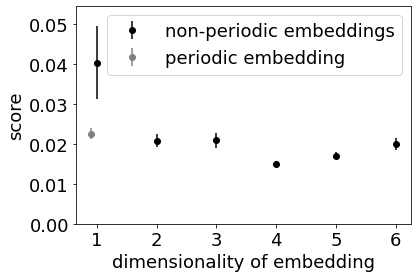

In [18]:
utils.plot_scores(plt.gca(), ai_prentice.scores, ai_prentice.errors)
# plt.savefig("graphs/tp_scores.pdf")
plt.show()

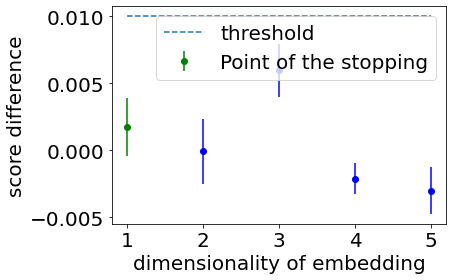

In [23]:
utils.plot_score_diffs(plt.gca(), ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)
plt.legend(loc='upper right')
# plt.savefig("graphs/tp_diffs.pdf")
plt.show()

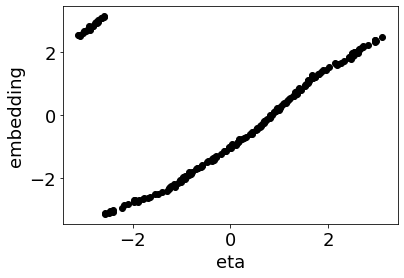

In [20]:
utils.plot_embedding_vs_conserved_quantity(plt.gca(), embedding, eta, "eta")
# plt.savefig("graphs/tp_eta.pdf")
plt.show()

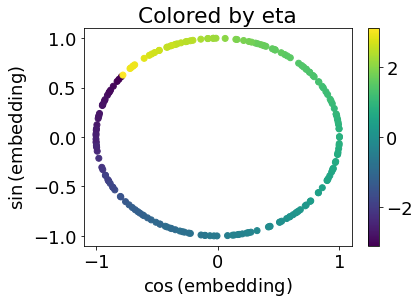

In [21]:
utils.plot_periodic_1d(*plt.subplots(), embedding, eta, "eta")
# plt.savefig("graphs/tp_circle.pdf")
plt.show()

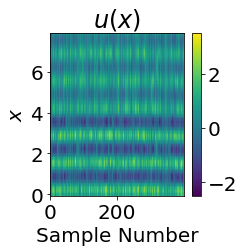

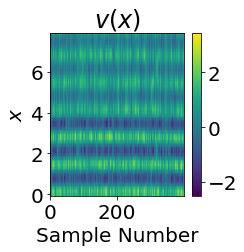

In [22]:
raw_data = turing_data["data"]

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(3, 3))
plt.subplot()
plt.imshow(raw_data[0,:,::2].T, aspect='auto', origin='lower')
plt.xlabel('Sample Number')
plt.ylabel('$x$')
plt.yticks([0,12.5, 25, 37.5],[0, 2, 4, 6])
plt.colorbar()
plt.title("$u(x)$")
# plt.savefig("graphs/tp_data_u.pdf")

plt.figure(figsize=(3, 3))
plt.subplot()

plt.imshow(raw_data[0,:,1::2].T, aspect='auto', origin='lower')
plt.xlabel('Sample Number')
plt.ylabel('$x$')
plt.yticks([0,12.5, 25, 37.5],[0, 2, 4, 6])
plt.colorbar()
plt.title("$v(x)$")
# plt.savefig("graphs/tp_data_v.pdf")